In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing

1. **Understanding the Dataset**: The first step in EDA is to understand what each column in the dataset represents. This includes understanding the data types of each column (numerical, categorical, ordinal, etc.), and how these columns relate to the problem you're trying to solve.
2. **Summary Statistics**: Generate summary statistics for the dataset. This includes measures of central tendency like mean, median, mode, and measures of dispersion like range, variance, standard deviation. For categorical variables, frequency counts are useful.
3. **Data Cleaning**: Identify and handle missing values, duplicate values, and outliers. This step often involves making some tough decisions about how to 'impute' missing values, or whether to exclude certain outliers.
4. **Feature Engineering**: Create new features that might help solve the problem more effectively. This could involve combining two or more features, creating polynomial features, or even using domain-specific knowledge to create new features.
5. **Visualizing the Data**: Create visualizations to understand the distribution of the data, the relationship between features, and the relationship between features and the target variable. This could involve histograms, box plots, scatter plots, correlation matrices, etc.
6. **Correlation Analysis**: Identify the correlations between different features in the dataset. This can help in understanding the relationships between different features. Correlation can be calculated for numerical variables using Pearson's correlation, and for categorical variables using Chi-Square test.
7. **Testing Hypotheses**: Formulate hypotheses based on your understanding of the dataset and use statistical tests to confirm or reject these hypotheses. This could involve t-tests, chi-square tests, ANOVA, etc.
8. **Iterative Process**: EDA is an iterative process. As you dive deeper into the data, you'll likely need to return to previous steps and make adjustments based on what you've learned.


In [3]:
# Load the dataset
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
df1 = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df2 = pd.DataFrame(data=housing.target, columns=["MedHouseValue"])
df = pd.concat([df1, df2], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df["AveBedrms"].value_counts()

AveBedrms
1.000000    288
1.125000     29
1.058824     26
1.100000     25
1.083333     25
           ... 
0.932886      1
0.906883      1
1.164894      1
1.030853      1
1.162264      1
Name: count, Length: 14233, dtype: int64

<Axes: >

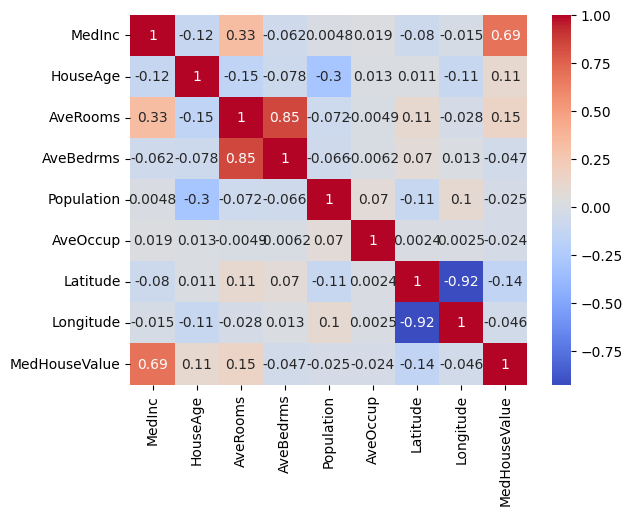

In [7]:
# Display the correlation matrix
corr = df.corr()

# Plotting the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

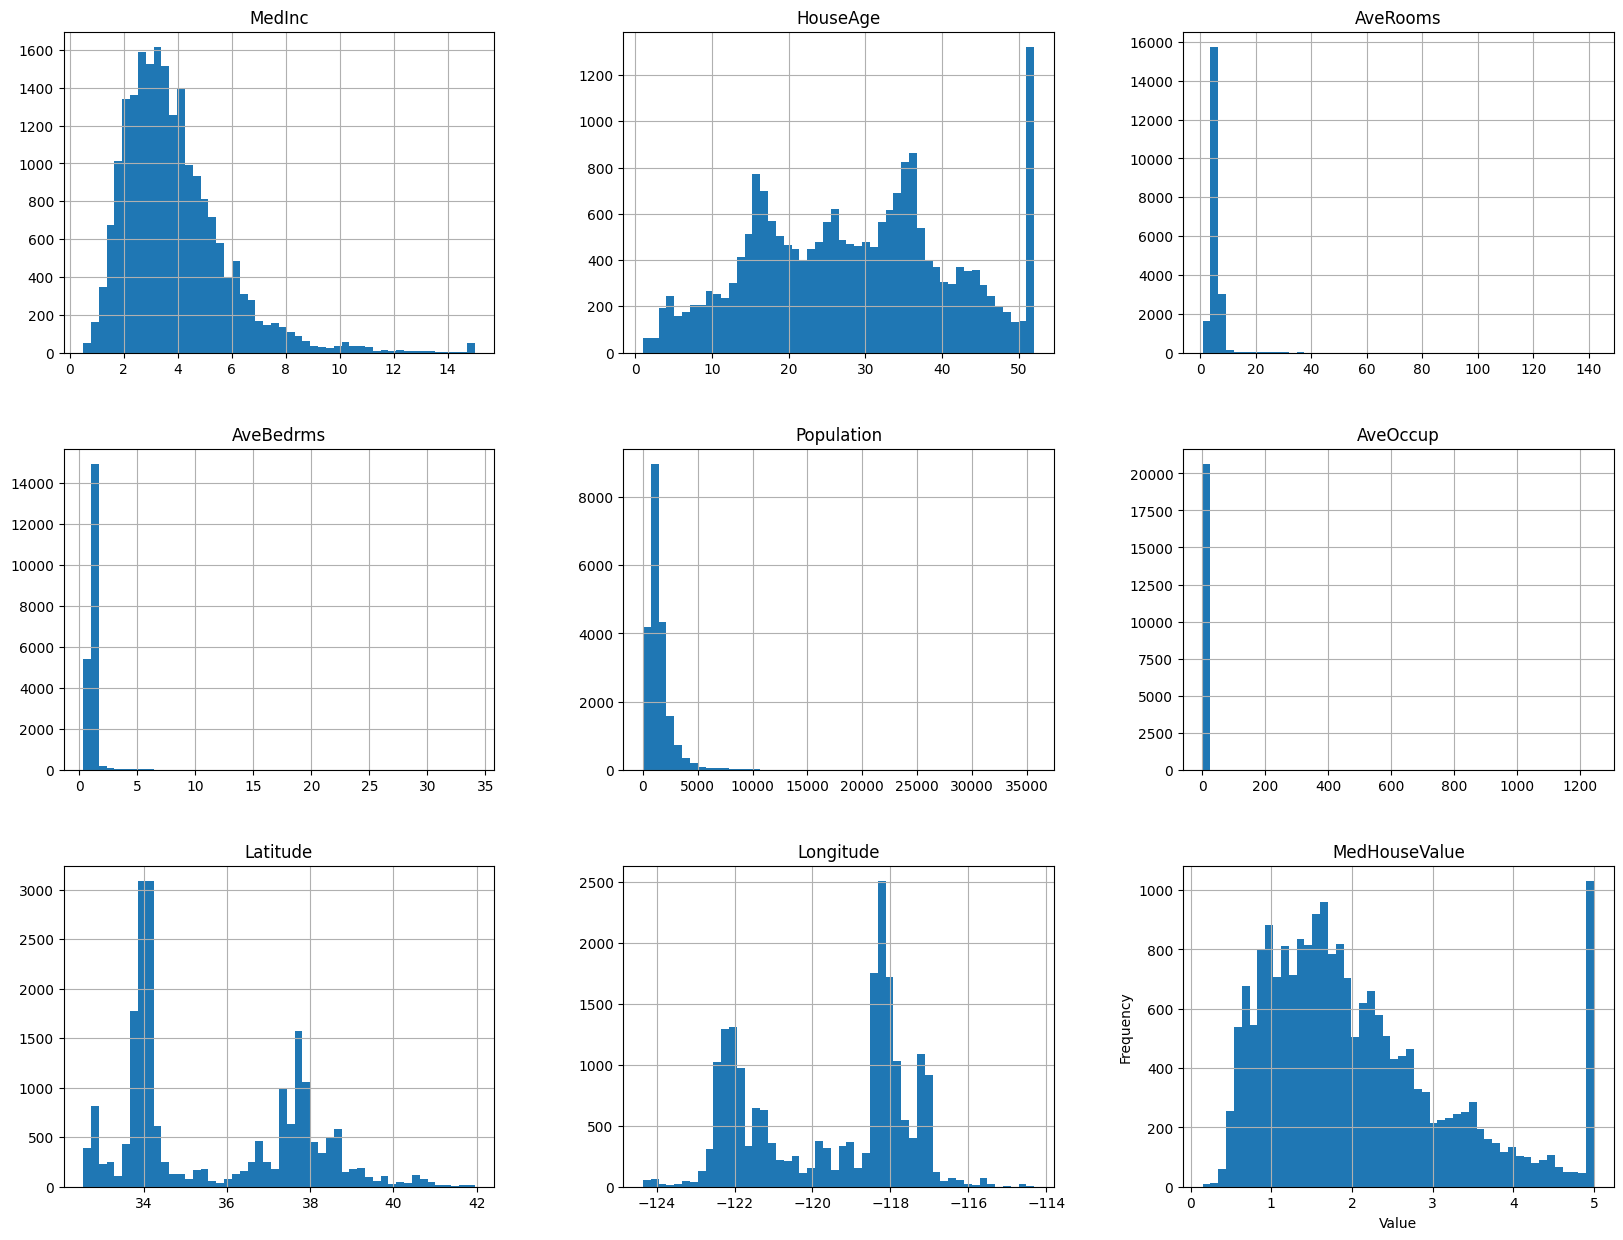

In [10]:
# Histograms for each variable
df.hist(bins=50, figsize=(20, 15))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

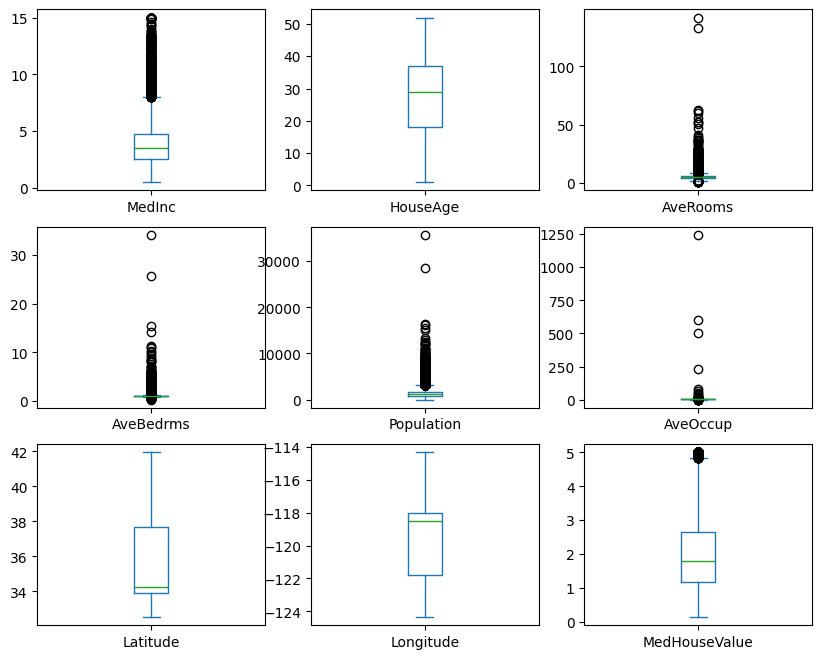

In [15]:
# Boxplots for each variable
df.plot(
    kind="box",
    subplots=True,
    layout=(3, 3),
    sharex=False,
    sharey=False,
    figsize=(10, 8),
)
plt.show()

Text(0, 0.5, 'Median House Value')

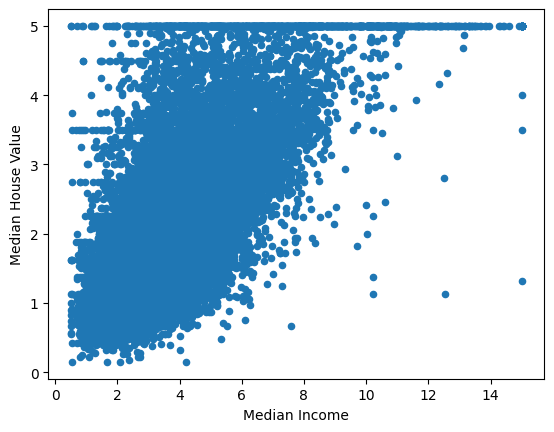

In [13]:
# Scatter plot of Median House Value vs. Median Income
df.plot(kind="scatter", x="MedInc", y="MedHouseValue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

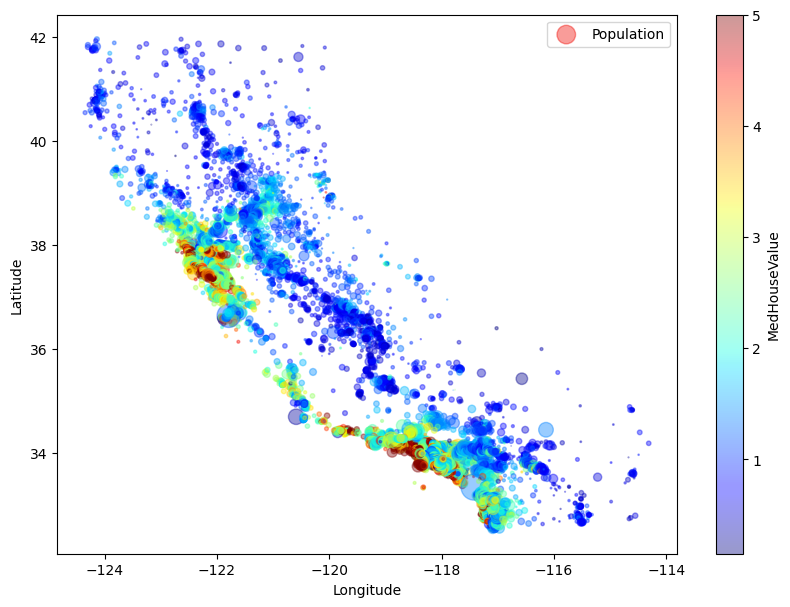

In [14]:
# Scatter plot with a third dimension of color showing the population
df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    s=df["Population"] / 100,
    label="Population",
    figsize=(10, 7),
    c="MedHouseValue",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()